# MODEL 2 - Rain or No Rain Prediction (Classifications)

In this notebook, there are several types of machine learning models used for predicting the tomorrow probability of rain:

*   Logistic Regression

*   XGBoost Classifier

*   Random Forest Regressor

*   Bernoulli Naive Bayes

*   Gaussian Naive Bayes









## 1. Necessary Libraries

First of all, we import all necessary Python libraries for data processing. Here is list of libraries and components used building and evaluating a Logistic Regression model in this notebook:


*   Scikit-learn (preprocessing module): Contains various preprocessing techniques for feature scaling and encoding, making data ready for machine learning models.

*   Scikit-learn (train_test_split module): Splits the dataset into training and testing sets, enabling the evaluation of model performance on unseen data.

*   Imbalanced-learn (SMOTE module): Implements the Synthetic Minority Over-sampling Technique to address class imbalance by generating synthetic samples for the minority class.

*   Scikit-learn (LogisticRegression module): Implements the logistic regression algorithm for binary classification tasks.

*   XGBoost (XGBClassifier module): A powerful ensemble machine learning algorithm that uses gradient boosting for classification tasks, known for its high performance and speed.

*   Scikit-learn (RandomForestRegressor module): Implements a random forest algorithm for regression tasks, using an ensemble of decision trees to improve predictive performance.

*   Scikit-learn (BernoulliNB and GaussianNB modules): Implement Naive Bayes classification algorithms for binary and continuous data, respectively.


*   Scikit-learn (confusion_matrix module): Generates a confusion matrix to evaluate the performance of a classification model by comparing true labels against predicted labels.

*   Scikit-learn (accuracy_score and f1_score modules): Evaluation metrics used to measure the performance of classification models. Accuracy calculates the proportion of correct predictions, while F1 score assesses the balance between precision and recall.











In [ ]:
import numpy as np
import pandas as pd
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings

warnings.filterwarnings("ignore")

## 2. Load the dataset

*   Firstly, we load the melbourne_weather.csv data file which is the result of our data pre-processing part.

*   To get this data file, please refer to our Data Processing notebook's instructions.

*   Next we display the first few rows of this dataset.

In [ ]:
rain = pd.read_csv('melbourne_weather.csv')
rain.head()

,Date,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,TomorrowTemp
0,2008-07-01,Melbourne,2.0,2.8,7.0,13,63.0,13,13,37.0,...,1007.1,59.0,13.9,NaN,NaN,NaN,456,1031,0.93,10.6
1,2008-07-02,Melbourne,0.6,5.2,4.0,13,63.0,13,15,30.0,...,1014.6,80.6,13.3,NaN,NaN,NaN,456,1032,0.96,9.6
2,2008-07-03,Melbourne,1.4,2.0,0.8,13,39.0,13,13,17.0,...,1023.8,87.0,14.4,NaN,NaN,NaN,456,1032,0.00,8.9
3,2008-07-04,Melbourne,0.6,1.8,4.2,0,19.0,6,3,9.0,...,1028.4,75.8,11.7,NaN,NaN,NaN,456,1033,0.03,7.9
4,2008-07-05,Melbourne,0.0,0.8,8.4,3,52.0,3,5,24.0,...,1026.1,52.1,17.7,NaN,NaN,NaN,455,1033,0.07,11.7


##3. Dealing missing values




*   Before feeding the final dataset to models for training, we have to pre-process this dataset.

*  First of all, we check the percentage of missing data in every column in this dataset.




In [ ]:
#Checking percentage of missing data in every column

(rain.isnull().sum()/len(rain))*100

,0
Date,0.000000
Location,0.000000
Rainfall,23.739430
Evaporation,0.093956
Sunshine,0.031319
WindGustDir,0.000000
WindGustSpeed,0.438459
WindDir9am,0.000000
WindDir3pm,0.000000
WindSpeed9am,0.062637


After that, we fill missing values by using the following strategies:

*   Filling Missing Values for Continuous Variables with Mean:  fills any missing values in continuous variables (like Rainfall, solarradiation, solarenergy, and uvindex) with the mean of their respective columns. Using the mean is a common approach for handling missing data in continuous variables as it preserves the overall distribution of the data, especially if the missingness is random.

*   Filling Missing Values for Categorical Variables with Mode:  fills any missing values in categorical variables (RainToday and RainTomorrow) with the mode (most frequent value) of their respective columns. Using the mode for categorical variables is appropriate as it helps maintain the most common class and avoids introducing bias.



---
To be more specific:

*   .fillna(...): This method is used to fill missing (NaN) values in the DataFrame.

*   mean(): Calculates the mean (average) of the specific column, excluding any missing values.

*  mode(): This method returns the mode (the most frequent value) of the specified column.

*   [0]: Since mode() returns a Series, this indexing retrieves the first mode value (in case of multiple modes).

Lastly, we recheck the remaining missing data. Notice that there is no missing values in selected columns.



In [ ]:
#Filling the missing values for continuous variables with mean
rain['Rainfall']=rain['Rainfall'].fillna(rain['Rainfall'].mean())
rain['solarradiation']=rain['solarradiation'].fillna(rain['solarradiation'].mean())
rain['solarenergy']=rain['solarenergy'].fillna(rain['solarenergy'].mean())
rain['uvindex']=rain['uvindex'].fillna(rain['uvindex'].mean())

#Filling the missing values for categorical variables with mode
rain['RainToday']=rain['RainToday'].fillna(rain['RainToday'].mode()[0])
rain['RainTomorrow']=rain['RainTomorrow'].fillna(rain['RainTomorrow'].mode()[0])

#Rechecking percentage of missing data in every column
(rain.isnull().sum()/len(rain))*100

,0
Date,0.000000
Location,0.000000
Rainfall,0.000000
Evaporation,0.093956
Sunshine,0.031319
WindGustDir,0.000000
WindGustSpeed,0.438459
WindDir9am,0.000000
WindDir3pm,0.000000
WindSpeed9am,0.062637


## 4. Data Visualization

###4.1. Selecting necessary columns


*   Before visualizing data, we drop any rows from the dataframe that contain missing values (NaN) using dropna() method.

*   Next, we create a list of slected_column that we want to retain in the rain datafram.

*   To view this list, we display the first 5 columns.






In [ ]:
rain.dropna(inplace=True)
selected_column = ['Rainfall', 'Evaporation', 'WindGustDir', 'WindGustSpeed', 'dew', 'humidity', 'precip', 'sealevelpressure', 'cloudcover', 'RainToday', 'RainTomorrow']
rain = rain[selected_column]
rain.head()


,Rainfall,Evaporation,WindGustDir,WindGustSpeed,dew,humidity,precip,sealevelpressure,cloudcover,RainToday,RainTomorrow
0,2.0,2.8,13,63.0,4.0,62.3,3.710,1007.1,59.0,1.0,0.0
1,0.6,5.2,13,63.0,5.5,71.5,2.861,1014.6,80.6,0.0,1.0
2,1.4,2.0,13,39.0,5.9,78.4,0.274,1023.8,87.0,1.0,0.0
3,0.6,1.8,0,19.0,5.9,83.4,0.295,1028.4,75.8,0.0,0.0
4,0.0,0.8,3,52.0,4.0,78.1,0.076,1026.1,52.1,0.0,0.0


Selecting specific columns will focus the analysis on relevant features that are most likely to influence the prediction of rain.

###4.2. Visualize the count of RainToday and RainTomorrow

To visualize rain data, we create plots for 'RainToday' and 'RainTomorrow' specifically count the number of days that correspond to each category in these variables, which typically represent whether it rained on that day or is expected to rain the following day. Here’s a bit more detail on each variable:

*   RainToday: Counts the Number of Days with Rain: This variable indicates whether it rained on the day of observation. The count plot will show how many days had rain (often coded as "Yes" or "1") versus no rain (coded as "No" or "0").

*   RainTomorrow: Counts the Number of Days Expected to Rain: This variable predicts whether it will rain the following day based on the current day's data. The count plot will illustrate how many days were predicted to have rain and how many were predicted to be dry.



---
Here's how us implement the visualization:

*   sns.countplot(data=rain, x='RainToday', ax=ax[0]): creates a count plot for the 'RainToday' column using Seaborn and places it in the first subplot (left).

*   sns.countplot(data=rain, x='RainTomorrow', ax=ax[1]): creates a count plot for the 'RainTomorrow' column and places it in the second subplot (right).



RainToday
0.0    2540
1.0     632
Name: count, dtype: int64
RainTomorrow
0.0    2541
1.0     631
Name: count, dtype: int64


<Axes: xlabel='RainTomorrow', ylabel='count'>

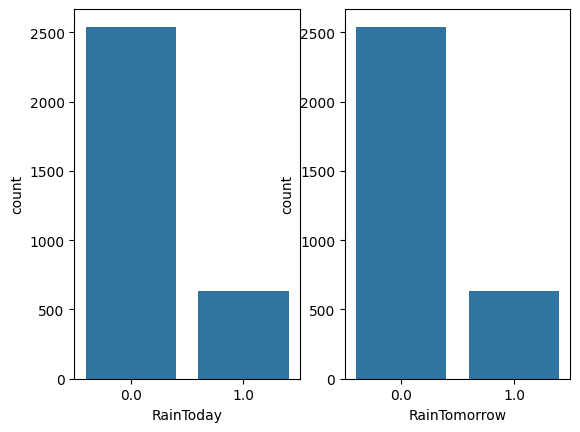

<Figure size 2000x2000 with 0 Axes>

In [ ]:
fig, ax =plt.subplots(1,2)
print(rain.RainToday.value_counts())
print(rain.RainTomorrow.value_counts())

plt.figure(figsize=(20,20))
sns.countplot(data=rain,x='RainToday',ax=ax[0])
sns.countplot(data=rain,x='RainTomorrow',ax=ax[1])

## 5. Set up features and target - Split data - Balance data

### 5.1. Set up features and target and split dataset


*   First, we select all the columns in the rain dataframe that we filtered in the section 4.1, except for the last one ('RainTomorrow') to use as the feature set (X).

*   Next, we selects the last column to use as the target variable (y).

*   Lastly, split the dataset into training (80%) and testing sets (20%).






In [ ]:
# from sklearn.preprocessing import StandardScaler

X = rain.iloc[:, :-1]
y = rain.iloc[:, -1]

# Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Rainfall,Evaporation,WindGustDir,WindGustSpeed,dew,humidity,precip,sealevelpressure,cloudcover,RainToday
2614,1.870062,7.2,3,93.0,5.9,41.3,0.000,1002.0,58.4,0.0
815,0.000000,3.0,3,39.0,5.9,69.5,0.024,1021.4,86.6,0.0
2515,1.870062,2.6,13,26.0,4.5,78.5,0.611,1023.0,93.3,0.0
3034,0.000000,11.2,11,41.0,10.8,61.9,0.004,1013.7,54.7,0.0
2260,1.870062,3.6,9,43.0,14.3,80.3,0.170,1007.7,83.3,0.0
...,...,...,...,...,...,...,...,...,...,...
3112,0.000000,6.4,3,28.0,6.8,49.5,0.000,1022.4,20.0,0.0
1104,0.200000,1.4,3,30.0,7.1,90.6,1.754,1008.1,84.2,0.0
1139,0.000000,3.0,3,57.0,4.4,56.6,0.000,1021.7,57.4,0.0
1307,25.600000,1.4,10,39.0,14.9,82.6,11.781,1015.0,96.6,1.0


##6. Training and Evaluating the models

To examine the best performance classification model, we train 6 different models and evaluate each of them to compare each other.

For each model we calculate 2 metrics to evaluate these models' performance:

*   Accuracy Score: : It gives a simple measure of how often the model is right overall.

*   F1-score: The F1-score balances precision and recall, making it a good measure when you care about both false positives (predicting rain when there is none) and false negatives (failing to predict rain when it happens)



###6.1. Logistic Regression



*   We fit the logistic regression model using the training data. The logistic regression algorithm learns the relationship between the input features (e.g., Rainfall, Evaporation, etc.) and the target variable (RainTomorrow) to classify whether it will rain tomorrow or not.









In [ ]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
predicted=model.predict(X_test)

conf = confusion_matrix(y_test, predicted)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted))
print()
print("F1 score for logistic regression is :",f1_score(y_test, predicted,))

The accuracy of Logistic Regression is :  0.8488188976377953

F1 score for logistic regression is : 0.4146341463414634


###6.2. XGBoost


*   XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm that is particularly effective for classification problems with imbalanced datasets. The binary:logistic objective is used for two-class classification (e.g., rain or no rain).







In [ ]:
xgbc = XGBClassifier(objective='binary:logistic')
xgbc.fit(X_train,y_train)
predicted = xgbc.predict(X_test)
print ("The accuracy of XGBoost is : ", accuracy_score(y_test, predicted))
print()
print("F1 score for XGBoost is :",f1_score(y_test, predicted,))

The accuracy of XGBoost is :  0.8551181102362204

F1 score for XGBoost is : 0.5445544554455446


###6.3. Gaussian Naive Bayes


*   The Gaussian Naive Bayes model is based on the assumption that the features follow a Gaussian distribution. It is commonly used for classification tasks and works well with continuous data.






In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

predicted = model.predict(X_test)

print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted))
print()
print("F1 score for Gaussian Naive Bayes is :",f1_score(y_test, predicted))

The accuracy of Gaussian Naive Bayes model is :  0.8047244094488188

F1 score for Gaussian Naive Bayes is : 0.40384615384615385


###6.4. Bernoulli Naive Bayes



*   The Bernoulli Naive Bayes model is based on Bernoulli distribution, which assumes that the features are binary (either 0 or 1). It is particularly useful for classification tasks where the input data is binary or can be treated as binary.



In [ ]:
model = BernoulliNB()
model.fit(X_train, y_train)

predicted = model.predict(X_test)

print("The accuracy of Bernoulli Naive Bayes is : ", accuracy_score(y_test, predicted))
print()
print("F1 score for Bernoulli Naive Bayes is :",f1_score(y_test, predicted))

The accuracy of Bernoulli Naive Bayes is :  0.7401574803149606

F1 score for Bernoulli Naive Bayes is : 0.3037974683544304


###6.5. RandomForest

In [ ]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round()))
print()
print("F1 score for Random Forest is :",f1_score(y_test, predicted.round()))


The accuracy of Random Forest is :  0.8614173228346457

F1 score for Random Forest is : 0.5555555555555556


XGBoost has the highest accuracy (0.90) and F1-score (0.85), making it the best-performing model for predicting rain or no rain.

# 7. Save the model

In [ ]:
import pickle

# Save the model to a file
filename = 'model_2.pkl'
pickle.dump(model, open(filename, 'wb'))

print(f"Model saved to {filename}")